# Predicting Lung Cancer Levels


In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn import svm

In [ ]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# unzip the dataset
!unzip -q /content/drive/MyDrive/Pune\ Smart\ City/puneSmartCityDataset.zip

replace cancer patient data sets.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
# read the dataset
df=pd.read_excel('cancer patient data sets.xlsx')
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [ ]:
df.shape

(1000, 25)

In [ ]:
df.iloc[:,1:24].columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring'],
      dtype='object')

# EDA

Age                        AxesSubplot(0.125,0.749828;0.227941x0.130172)
Gender                  AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Air Pollution           AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Alcohol use                AxesSubplot(0.125,0.593621;0.227941x0.130172)
Dust Allergy            AxesSubplot(0.398529,0.593621;0.227941x0.130172)
OccuPational Hazards    AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Genetic Risk               AxesSubplot(0.125,0.437414;0.227941x0.130172)
chronic Lung Disease    AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Balanced Diet           AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Obesity                    AxesSubplot(0.125,0.281207;0.227941x0.130172)
Smoking                 AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Passive Smoker          AxesSubplot(0.672059,0.281207;0.227941x0.130172)
Chest Pain                    AxesSubplot(0.125,0.125;0.227941x0.130172)
dtype: object

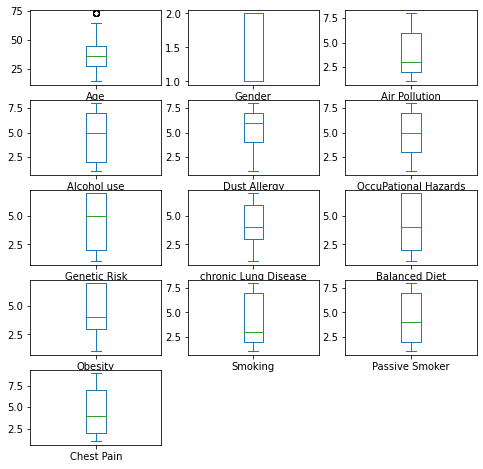

In [ ]:
box=["Age","Gender","Air Pollution","Alcohol use","Dust Allergy","OccuPational Hazards","Genetic Risk","chronic Lung Disease","Balanced Diet",
    "Obesity","Smoking","Passive Smoker","Chest Pain"]
df[box].plot(kind="box", subplots="True" , layout=(5, 3) ,figsize=(8,8))

Age                        AxesSubplot(0.125,0.749828;0.227941x0.130172)
Gender                  AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Air Pollution           AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Alcohol use                AxesSubplot(0.125,0.593621;0.227941x0.130172)
Dust Allergy            AxesSubplot(0.398529,0.593621;0.227941x0.130172)
OccuPational Hazards    AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Genetic Risk               AxesSubplot(0.125,0.437414;0.227941x0.130172)
chronic Lung Disease    AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Balanced Diet           AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Obesity                    AxesSubplot(0.125,0.281207;0.227941x0.130172)
Smoking                 AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Passive Smoker          AxesSubplot(0.672059,0.281207;0.227941x0.130172)
Chest Pain                    AxesSubplot(0.125,0.125;0.227941x0.130172)
dtype: object

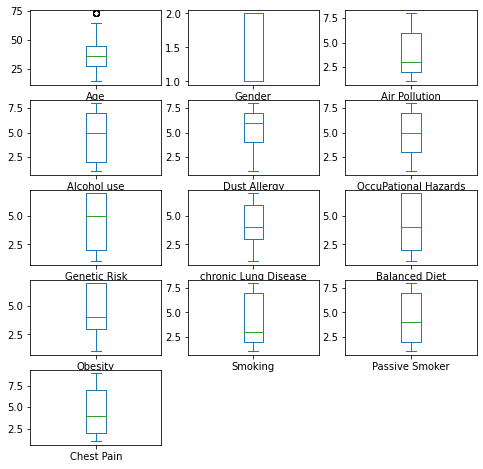

In [ ]:
box2=["Coughing of Blood","Fatigue","Weight Loss","Shortness of Breath",
    "Wheezing","Swallowing Difficulty","Clubbing of Finger Nails","Frequent Cold","Dry Cough","Snoring","Level"]
df[box].plot(kind="box", subplots="True" , layout=(5, 3) ,figsize=(8,8))

# 

In [ ]:
# seperating target vectors from features
X=df.iloc[:,1:24].values
X.shape

(1000, 23)

In [ ]:
y=df.iloc[:,24].values

In [ ]:
y[0:10]

array(['Low', 'Medium', 'High', 'High', 'High', 'High', 'Low', 'Low',
       'Medium', 'Medium'], dtype=object)

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
le_level= preprocessing.LabelEncoder()
y[:]=le_level.fit_transform(y[:]).astype(int)
y=y.astype(int)

In [ ]:
y[0:10]

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 23) (800,)
Test set: (200, 23) (200,)


In [ ]:
for kernel in ['linear','poly','sigmoid','rbf']:
    model = svm.SVC(kernel=kernel).fit(X_train, y_train)
    pred=model.predict(X_test)
    print(f'The classification report of svm of kernel = {kernel} is :\n')
    print(classification_report(pred,y_test),'\n')
    print(f"Avg F1-score: {f1_score(y_test, pred, average='weighted',zero_division='warn')}")
    print(f"Jaccard score: {jaccard_score(y_test, pred, average='micro')}")
    print(f"Accuracy: {accuracy_score(y_test, pred)}\n\n")

The classification report of svm of kernel = linear is :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        68

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200
 

Avg F1-score: 1.0
Jaccard score: 1.0
Accuracy: 1.0


The classification report of svm of kernel = poly is :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       0.93      0.88      0.90        58
           2       0.90      0.94      0.92        65

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200
 

Avg F1-score: 0.9451097877436955
Jaccard score: 0.8957345971563981


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = svm.SVC(kernel="linear").fit(X_train, y_train)
pred=model.predict(X_test)
print(f'The classification report of svm of kernel = {kernel} is :\n')
print(classification_report(pred,y_test),'\n')
print(f"Avg F1-score: {f1_score(y_test, pred, average='weighted',zero_division='warn')}")
print(f"Jaccard score: {jaccard_score(y_test, pred, average='micro')}")
print(f"Accuracy: {accuracy_score(y_test, pred)}\n\n")

The classification report of svm of kernel = rbf is :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        68

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200
 

Avg F1-score: 1.0
Jaccard score: 1.0
Accuracy: 1.0




In [ ]:
df.iloc[:,1:24].columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring'],
      dtype='object')

In [ ]:
X_test[0]

array([32,  2,  1,  6,  7,  8,  7,  6,  7,  7,  3,  4,  8,  7,  3,  2,  6,
        4,  2,  3,  1,  2,  1])

In [ ]:
model.predict([[22, 2, 8, 1, 9, 3, 2, 2, 1, 1, 5, 5, 9, 1, 8, 5, 7, 2,7, 2, 2, 2, 5]])

array([1])